<a id='intro'></a>
## Introduction

### Dataset Description 

> In this project we have two data sets about Gun usage in USA, the first data(Gun data == gun) is about every state in USA and number of permit to use guns, and the numbers and kinds of guns (guns, long guns) and the statues of it like (returned, rented, private, redumption and prepawn) that is used in that state, since Nov. 1998 to Septemper 2017. The other data set, we have diffrent facts - there are 65 differnt census measurement as value of Fact- not so related to the gun owning. however it provides us some facts are related and we will use them to anylysis of the first data for answering the questions too.


### Question(s) for Analysis
> 1.What census variable or fact value is most associated with high gun per capita per state? Ceusus data includes state as variable, . 

> 2.Which states have had the highest growth and the lowest growth in gun registrations from Apr 2010 to Jul 2016?

> 3.What is the overall trend of gun purchases by year or by year and month?

In [111]:
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<a id='wrangling'></a>
## Data Wrangling

> Upload the data, read it, and see the information of every data set. 

In [112]:
census = pd.read_csv('US_census.csv')
gun = pd.read_csv('gun-data.csv') 

In [113]:
census.head(2)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"


In [114]:
gun.head(2)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303


***A.1 ) Check the types of the data***

In [115]:
gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

**Facts about the data**

* We can see that the columns of the gun data are 27, and 12485 rows.*

* there are a lot of missing values like in the permit recheck, "others", "pre pawn others", "redemption others", "returned hund gun"...." *

* All the floats should be int. and we have to reduce the memory usage* 

# Cleaning Data # 
---------


__Change the type, from float to int.__

In [116]:
gun[gun.select_dtypes('int64').columns] = gun.select_dtypes('int64').astype('int16')

*make sure of the changes*

In [117]:
gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int16  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [118]:
gun['permit'] = gun['permit'].astype(pd.Int32Dtype())
gun['handgun'] = gun['handgun'].astype(pd.Int32Dtype())
gun['long_gun'] = gun['long_gun'].astype(pd.Int32Dtype())
gun['other'] = gun['other'].astype(pd.Int32Dtype())
gun['multiple'] = gun['multiple'].astype(pd.Int32Dtype())
gun['admin'] = gun['admin'].astype(pd.Int32Dtype())
gun['prepawn_handgun'] = gun['prepawn_handgun'].astype(pd.Int32Dtype())
gun['prepawn_long_gun'] =gun['prepawn_long_gun'].astype(pd.Int32Dtype())
gun['prepawn_other'] =gun['prepawn_other'].astype(pd.Int32Dtype())
gun['redemption_handgun'] =gun['redemption_handgun'].astype(pd.Int32Dtype())
gun['redemption_long_gun'] = gun ['redemption_long_gun'].astype(pd.Int32Dtype())
gun['redemption_other'] = gun ['redemption_other'].astype(pd.Int32Dtype())
gun['returned_handgun'] = gun ['returned_handgun'].astype(pd.Int32Dtype())
gun['returned_long_gun'] = gun ['returned_long_gun'].astype(pd.Int32Dtype())
gun['returned_other'] = gun ['returned_other'].astype(pd.Int32Dtype())
gun['rentals_handgun'] = gun ['rentals_handgun'].astype(pd.Int32Dtype())
gun['rentals_long_gun'] = gun ['rentals_long_gun'].astype(pd.Int32Dtype())
gun['returned_other'] = gun ['returned_other'].astype(pd.Int32Dtype())
gun['rentals_handgun'] = gun ['rentals_handgun'].astype(pd.Int32Dtype())
gun['rentals_long_gun'] = gun ['rentals_long_gun'].astype(pd.Int32Dtype())
gun['private_sale_handgun'] = gun ['private_sale_handgun'].astype(pd.Int32Dtype())
gun['private_sale_long_gun'] = gun ['private_sale_long_gun'].astype(pd.Int32Dtype())
gun['private_sale_other'] = gun ['private_sale_other'].astype(pd.Int32Dtype())
gun['return_to_seller_handgun'] = gun ['return_to_seller_handgun'].astype(pd.Int32Dtype())
gun['return_to_seller_long_gun'] = gun ['return_to_seller_long_gun'].astype(pd.Int32Dtype())
gun['return_to_seller_other'] = gun ['return_to_seller_other'].astype(pd.Int32Dtype())

In [119]:
gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  Int32  
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  Int32  
 5   long_gun                   12466 non-null  Int32  
 6   other                      5500 non-null   Int32  
 7   multiple                   12485 non-null  Int32  
 8   admin                      12462 non-null  Int32  
 9   prepawn_handgun            10542 non-null  Int32  
 10  prepawn_long_gun           10540 non-null  Int32  
 11  prepawn_other              5115 non-null   Int32  
 12  redemption_handgun         10545 non-null  Int32  
 13  redemption_long_gun        10544 non-null  Int



***B.1 ) Check if there is duplicates***

In [120]:
gun.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12480    False
12481    False
12482    False
12483    False
12484    False
Length: 12485, dtype: bool

*Or, we can use this line to check effectivly*

In [121]:
sum(gun.duplicated())

0

**Facts, There's no duplicates**

*Now, lets delete the nan in the data. And change memory usage and data type*

In [122]:
gun.isnull().sum()


month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

gun= gun.fillna(gun....(), axis=0, inplace=True) -- I have to delete the NA ?? 

In [123]:
gun.head(4)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717,0.0,5734,6320,221,317,0,15,...,0,0,0,9,16,3,0,0,3,32019
1,2017-09,Alaska,209,2.0,2320,2930,219,160,0,5,...,0,0,0,17,24,1,0,0,0,6303
2,2017-09,Arizona,5069,382.0,11063,7946,920,631,0,13,...,0,0,0,38,12,2,0,0,0,28394
3,2017-09,Arkansas,2935,632.0,4347,6063,165,366,51,12,...,0,0,0,13,23,0,0,2,1,17747


**Extract years and monthes to deal with the data accuretlly** 

In [124]:
gun['year']=gun['month'].apply(lambda x: x.split("-")[0]).astype(int)


In [125]:
gun['year'].unique()


array([2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007,
       2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998])

In [126]:
gun['months'] = gun['month'].apply(lambda x: x.split("-")[1]).astype(int)


In [127]:
gun['months'].unique()

array([ 9,  8,  7,  6,  5,  4,  3,  2,  1, 12, 11, 10])

In [128]:
gun.head(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
0,2017-09,Alabama,16717,0.0,5734,6320,221,317,0,15,...,0,9,16,3,0,0,3,32019,2017,9


In [129]:
gun.shape

(12485, 29)

**A.2 ) Now, lets check the second data set. the info and duplicates.**

In [130]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [131]:
 census.head(2)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"


**Facts:**
* All of the values are abjects.
* There are missing values.
* There are 85 raws and 52 columns

In [132]:
sum(census.duplicated())

3

*There are 3 duplicates, we have to drop them*
*And, We will drop the fact notes since it does not have valuable data*

In [133]:
census.drop_duplicates(inplace= True)

In [134]:
sum(census.duplicated())

0

In [135]:
census= census.drop('Fact Note', axis=1)

In [136]:
census.head(4)

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"


*We have to check for the nulls*

In [137]:
census.isnull().sum(). sum()

852

*I can't decide if I have to drope all the nulls. maybe not.*

In [138]:
 census.describe()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,65,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,65,64,64,64,63,64,63,64,64,...,65,64,64,64,63,65,65,64,65,64
top,"Population estimates, July 1, 2016, (V2016)","4,863,300",7.30%,50.30%,50.90%,6.80%,3.30%,0.10%,51.60%,51.10%,...,865454,0.048,50.40%,2.50%,1.90%,"8,411,808","7,288,000",1.50%,"5,778,708",7.10%
freq,1,1,2,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


In [139]:
states=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',  
        'Hawaii', 'Idaho', 'Illinois','Indiana', 'Iowa', 'Kansas', 
        'Kentucky', 'Louisiana', 'Maine','Maryland', 'Massachusetts', 
        'Michigan','Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon','Pennsylvania', 
        'Rhode Island', 'South Carolina','South Dakota', 'Tennessee', 'Texas', 'Utah', 
        'Vermont','Virginia', 'Washington', 'West Virginia','Wisconsin', 'Wyoming']

In [140]:
for state in states:
    census[state].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
    # remove all the non digit character
    census[state]=pd.to_numeric(census[state], downcast='float', errors='ignore')

*We want to manipulate states So we gave them a variable*

## Exploratory Data Analysis


> 1.What census variable or fact value is most associated with high gun per capita per state? Ceusus data includes state as variable

*In order to calculate gun per capita,  the gun totals and population for each state needed to be fetched at first, and the gun and census data needed to be combined. Also, I notice the state in census data is divided as 50 columns, however, in gun data, state is
only one columns which has 46 different state value.*
**And Because of that we will change the raws an columns so we can deal with both data**

In [141]:
census.set_index('Fact',inplace=True)
census_T = census.T.reset_index()

In [142]:
census_T.head(2)

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,(c),Value Flags,-,D,F,FN,NaN,S,X,Z
0,Alabama,4863300.0,4780131.0,170.0,4779736.0,600.0,640.0,2260.0,2370.0,1610.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,2640.0,1040.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Rename the column name from index to state to match the column name in gun data*

In [143]:
census_T.rename(columns={'index':'state'},inplace = True)

*The most of the data is between 2010 to 2016, so we can merge between both data we have to use the inner data*

In [144]:
gun10=gun[gun['year'] == 2016]
gun16=gun[gun['year'] == 2010] 

In [145]:
gun10.head(2)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
495,2016-12,Alabama,26996,0.0,13733,17519,376,533,0,10,...,0,2,2,1,0,0,0,-3522,2016,12
496,2016-12,Alaska,254,0.0,4087,3698,243,191,0,3,...,0,0,0,0,0,0,0,8786,2016,12


*Group by gun data by state for 2010 and 2016*


In [146]:
guntotal10= gun10.groupby(['state'])['totals'].sum().reset_index()
guntotal16= gun16.groupby(['state'])['totals'].sum().reset_index()

In [147]:
guntotal16.head()

,state,totals
0,Alabama,243071
1,Alaska,65909
2,Arizona,206050
3,Arkansas,191448
4,California,29967


In [148]:
guntotal10.head()

,state,totals
0,Alabama,-169485
1,Alaska,87647
2,Arizona,-108009
3,Arkansas,266014
4,California,-47665


In [149]:
#Rename the dataset to represent different time point 
guntotal10.rename(columns={'totals':'2010_totals'},inplace = True)
guntotal16.rename(columns={'totals':'2016_totals'},inplace = True)

In [150]:
#Merge 2010 and 2016 gun data summary 
guntotal = guntotal16.merge(guntotal10, on='state', how='inner')

*See the result*

In [151]:
guntotal.head(4)

,state,2016_totals,2010_totals
0,Alabama,243071,-169485
1,Alaska,65909,87647
2,Arizona,206050,-108009
3,Arkansas,191448,266014


In [152]:
#Merge gun and census data with inner join, by state column 
result = guntotal.merge(census_T, on='state', how='inner')

In [153]:
result.head(4)

,state,2016_totals,2010_totals,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)",...,(c),Value Flags,-,D,F,FN,NaN,S,X,Z
0,Alabama,243071,-169485,4863300.0,4780131.0,170.0,4779736.0,600.0,640.0,2260.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,65909,87647,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona,206050,-108009,6931071.0,6392301.0,840.0,6392017.0,630.0,710.0,2350.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arkansas,191448,266014,2988248.0,2916025.0,250.0,2915918.0,640.0,680.0,2360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
result['Population estimates, July 1, 2016,(V2016)'] = result['Population estimates, July 1, 2016,(V2016)'].replace(',', '').astype(float)

result['Population estimates base, April 1, 2010, (V2016)'] = result['Population estimates base, April 1, 2010,  (V2016)'].replace(',', '').astype(float)

<class 'KeyError'>: 'Population estimates, July 1, 2016,(V2016)'

In [155]:
result['Gun_Per_Capital_2016'] = result['2016_totals'] / result['Population estimates, July 1, 2016,  (V2016)']

In [156]:
result['Gun_Per_Capital_2010'] = result['2010_totals'] / result['Population estimates base, April 1, 2010,  (V2016)']

In [157]:
result.head(9)


,state,2016_totals,2010_totals,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)",...,-,D,F,FN,NaN,S,X,Z,Gun_Per_Capital_2016,Gun_Per_Capital_2010
0,Alabama,243071,-169485,4863300.0,4780131.0,170.0,4779736.0,600.0,640.0,2260.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049981,-0.035456
1,Alaska,65909,87647,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.088839,0.123403
2,Arizona,206050,-108009,6931071.0,6392301.0,840.0,6392017.0,630.0,710.0,2350.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029728,-0.016897
3,Arkansas,191448,266014,2988248.0,2916025.0,250.0,2915918.0,640.0,680.0,2360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064067,0.091225
4,California,29967,-47665,39250017.0,37254522.0,540.0,37253956.0,630.0,680.0,2320.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000763,-0.001279
5,Colorado,235284,-245918,5540545.0,5029324.0,1020.0,5029196.0,610.0,680.0,2280.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042466,-0.048897
6,Connecticut,179595,186620,3576452.0,3574114.0,10.0,3574097.0,520.0,570.0,2110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050216,0.052214
7,Delaware,19240,59430,952065.0,897936.0,600.0,897934.0,580.0,620.0,2150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020209,0.066185
8,Florida,-227085,-71988,20612439.0,18804592.0,960.0,18801310.0,550.0,570.0,2010.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011017,-0.003828


the highest state per capital on 2010

In [158]:
result.nlargest(5,'Gun_Per_Capital_2010')


,state,2016_totals,2010_totals,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)",...,-,D,F,FN,NaN,S,X,Z,Gun_Per_Capital_2016,Gun_Per_Capital_2010
25,Montana,101095,136337,1042520.0,989414.0,540.0,989415.0,600.0,630.0,2180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.096972,0.137796
40,South Dakota,63151,111921,865454.0,814195.0,63.0,814180.0,71.0,73.0,246.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.072969,0.137462
47,West Virginia,159550,242350,1831102.0,1853011.0,120.0,1852994.0,550.0,560.0,2050.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.087133,0.130787
28,New Hampshire,79940,165164,1334795.0,1316461.0,140.0,1316470.0,480.0,530.0,1950.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059889,0.125461
1,Alaska,65909,87647,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.088839,0.123403


the highest state per capital on 2016

In [159]:
result.nlargest(5,'Gun_Per_Capital_2016')

,state,2016_totals,2010_totals,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)",...,-,D,F,FN,NaN,S,X,Z,Gun_Per_Capital_2016,Gun_Per_Capital_2010
25,Montana,101095,136337,1042520.0,989414.0,540.0,989415.0,600.0,630.0,2180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.096972,0.137796
1,Alaska,65909,87647,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.088839,0.123403
47,West Virginia,159550,242350,1831102.0,1853011.0,120.0,1852994.0,550.0,560.0,2050.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.087133,0.130787
49,Wyoming,47709,63594,585501.0,563767.0,390.0,563626.0,650.0,710.0,2370.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.081484,0.112802
40,South Dakota,63151,111921,865454.0,814195.0,63.0,814180.0,71.0,73.0,246.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.072969,0.137462


In [160]:
fact = result.drop(['Gun_Per_Capital_2010','state','FIPS Code','2016_totals','2010_totals'],axis=1)


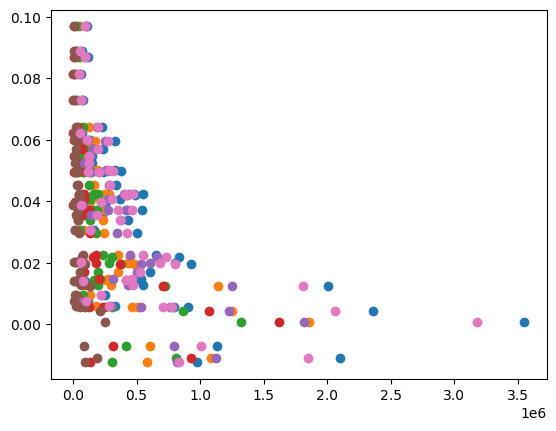

<class 'TypeError'>: argument of type 'float' is not iterable

In [161]:
for col in list(fact):
    if 'firms' in col:
        plt.scatter(fact[col],fact['Gun_Per_Capital_2016'], label =col)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


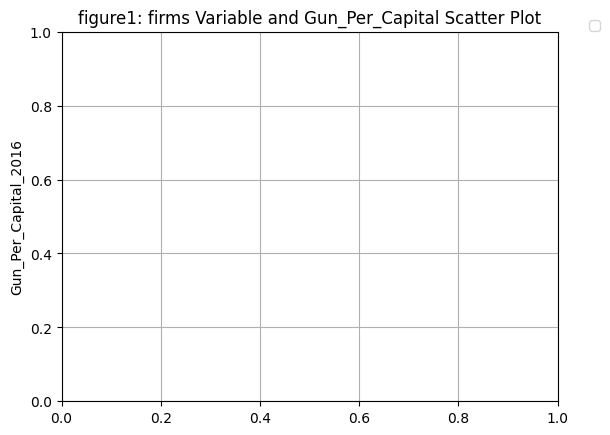

In [162]:
plt.ylabel("Gun_Per_Capital_2016")
plt.title("figure1: firms Variable and Gun_Per_Capital Scatter Plot")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [163]:
#Keep only 6 variable in fact table to create scatter plot with Gun Per capital since they have week association
imp =['White alone, percent, July 1, 2016,  (V2016)',
    'Persons 65 years and over, percent, April 1, 2010',
    'Owner-occupied housing unit rate, 2011-2015',
    'Asian alone, percent, July 1, 2016,  (V2016)',
    'Foreign born persons, percent, 2011-2015', 
    'Median gross rent, 2011-2015']

White alone, percent, July 1, 2016,  (V2016)


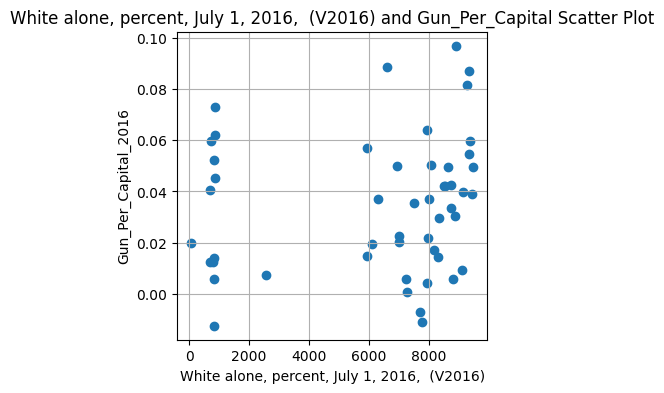

Persons 65 years and over, percent, April 1, 2010


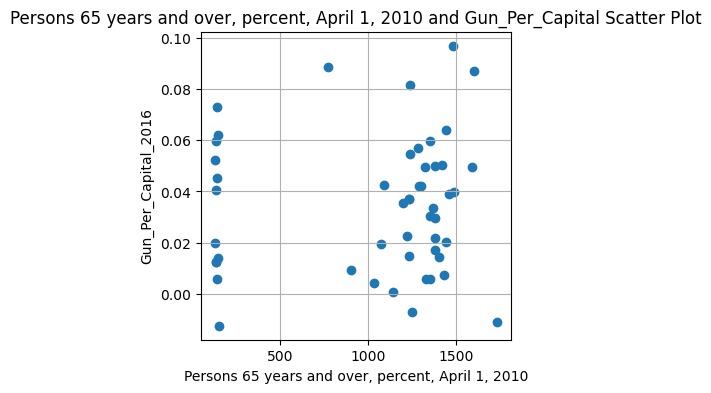

Owner-occupied housing unit rate, 2011-2015


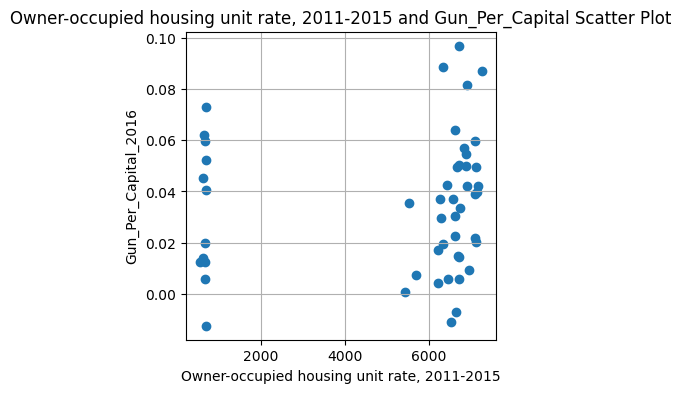

Asian alone, percent, July 1, 2016,  (V2016)


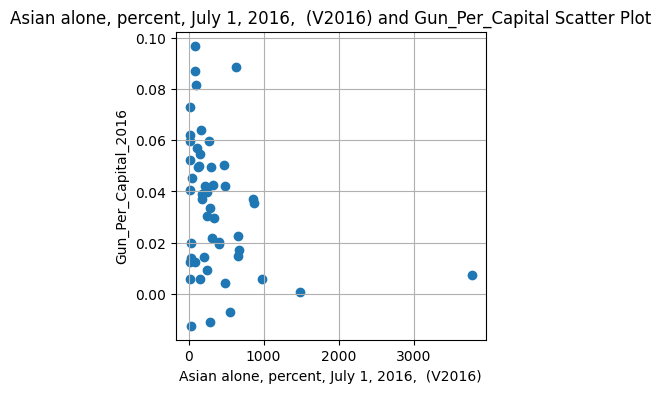

Foreign born persons, percent, 2011-2015


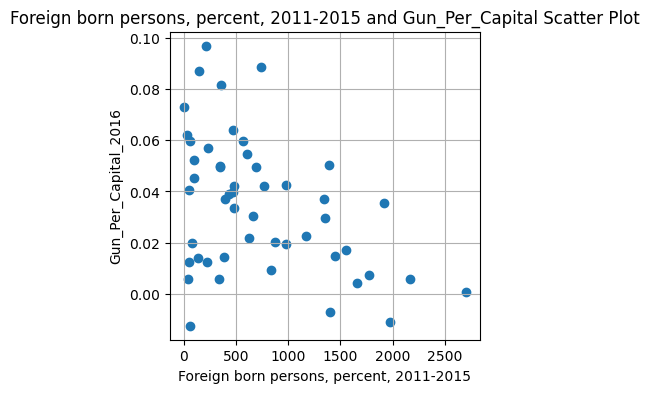

Median gross rent, 2011-2015


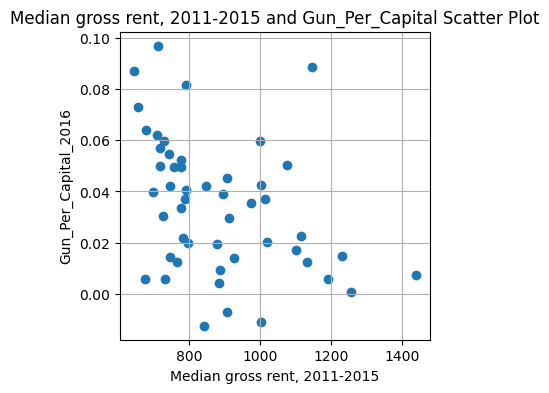

In [164]:
for col in imp:
    plt.figure(figsize=(4,4))
    print(col)
    plt.scatter(fact[col],fact['Gun_Per_Capital_2016'], label =col)
    plt.title(col+" and Gun_Per_Capital Scatter Plot")     
    plt.ylabel("Gun_Per_Capital_2016")
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

# Q2Which states have had the highest growth and the lowest growth in gun registrations? 

In [165]:
result['gun_growth'] = result['2016_totals']/(result['2016_totals']-result['2010_totals'])


In [166]:
result['gun_growth'].max() # the result of the biggest growth %


3.316577293811889

In [167]:
#List Top 5 rows by gun growth rate descending
result.nlargest(5,'gun_growth')

,state,2016_totals,2010_totals,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)",...,D,F,FN,NaN,S,X,Z,Gun_Per_Capital_2016,Gun_Per_Capital_2010,gun_growth
39,South Carolina,201628,140834,4961119.0,4625410.0,73.0,4625364.0,59.0,65.0,221.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.040642,0.030448,3.316577
13,Indiana,280114,126005,6633053.0,6484136.0,230.0,6483802.0,640.0,670.0,2380.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042230,0.019433,1.817636
35,Oklahoma,233909,102446,3923561.0,3751615.0,46.0,3751351.0,68.0,7.0,245.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059617,0.027307,1.779276
8,Florida,-227085,-71988,20612439.0,18804592.0,960.0,18801310.0,550.0,570.0,2010.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011017,-0.003828,1.464148
37,Pennsylvania,-159755,-36428,12784227.0,12702857.0,6.0,12702379.0,56.0,57.0,209.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.012496,-0.002868,1.295377


#Create Bar chart for every states'gun growth 
#Set the figure size 

In [168]:
plt.figure(figsize=(30,30))

<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

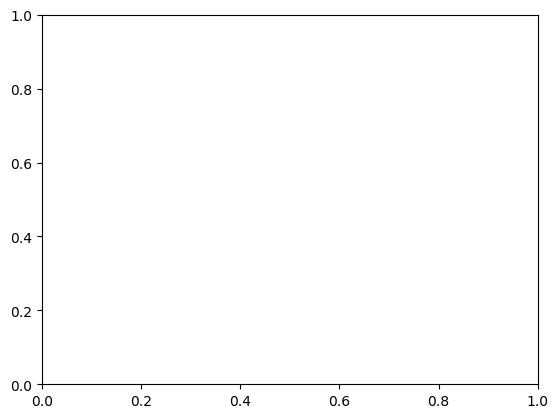

In [169]:
plt.rcdefaults()
fig, ax = plt.subplots()

In [170]:
sorted = result.sort_values(by=['gun_growth'])


In [171]:
y_pos = np.arange(len(sorted['state']))
error = np.random.rand(len(sorted['state']))
ax.barh(y_pos, (sorted['gun_growth']*100), xerr=error, align='center',height=2,linewidth=5,color='green', ecolor='black')


<BarContainer object of 50 artists>

In [172]:
ax.set_yticks(y_pos)
ax.set_xlabel("Gun Registration Growth %")
ax.set_yticklabels(sorted['state'],size=6)

[Text(0, 0, 'Connecticut'),
 Text(0, 1, 'Oregon'),
 Text(0, 2, 'Illinois'),
 Text(0, 3, 'Mississippi'),
 Text(0, 4, 'Alaska'),
 Text(0, 5, 'Wyoming'),
 Text(0, 6, 'Montana'),
 Text(0, 7, 'Ohio'),
 Text(0, 8, 'Kansas'),
 Text(0, 9, 'Arkansas'),
 Text(0, 10, 'Nevada'),
 Text(0, 11, 'New Mexico'),
 Text(0, 12, 'West Virginia'),
 Text(0, 13, 'Nebraska'),
 Text(0, 14, 'North Dakota'),
 Text(0, 15, 'Hawaii'),
 Text(0, 16, 'Iowa'),
 Text(0, 17, 'Vermont'),
 Text(0, 18, 'Maine'),
 Text(0, 19, 'Idaho'),
 Text(0, 20, 'South Dakota'),
 Text(0, 21, 'Rhode Island'),
 Text(0, 22, 'Maryland'),
 Text(0, 23, 'Massachusetts'),
 Text(0, 24, 'New Hampshire'),
 Text(0, 25, 'New Jersey'),
 Text(0, 26, 'Delaware'),
 Text(0, 27, 'Utah'),
 Text(0, 28, 'Kentucky'),
 Text(0, 29, 'Missouri'),
 Text(0, 30, 'California'),
 Text(0, 31, 'Colorado'),
 Text(0, 32, 'Virginia'),
 Text(0, 33, 'Michigan'),
 Text(0, 34, 'North Carolina'),
 Text(0, 35, 'Tennessee'),
 Text(0, 36, 'Georgia'),
 Text(0, 37, 'Alabama'),
 Text(0, 

In [173]:
ax.invert_yaxis()  # labels read top-to-bottom


In [174]:
ax.tick_params(axis='x', colors='green')
ax.tick_params(axis='y', colors='black')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


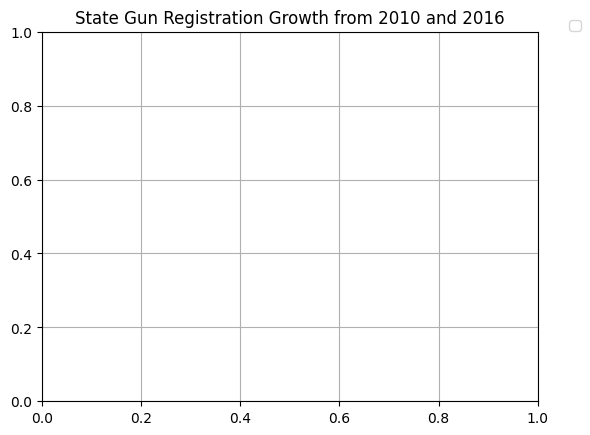

In [175]:
plt.title("State Gun Registration Growth from 2010 and 2016")     
plt.grid(True)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

Research Question 3  :
# 
# What is the overall trend of gun purchases?

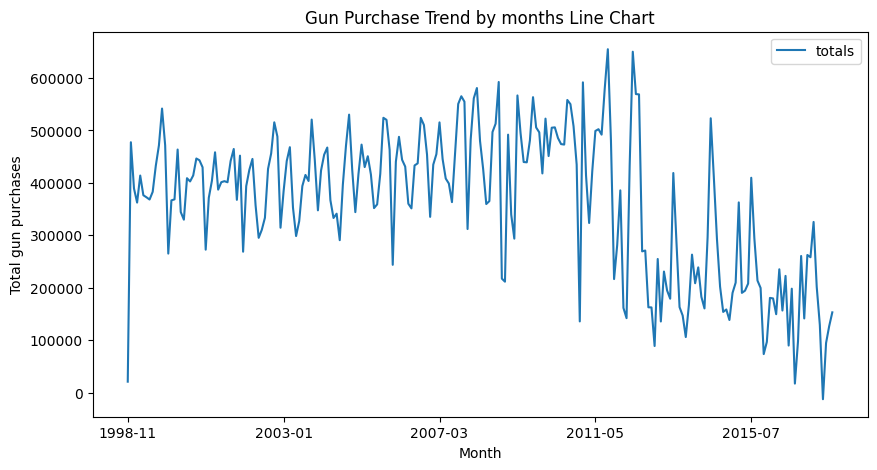

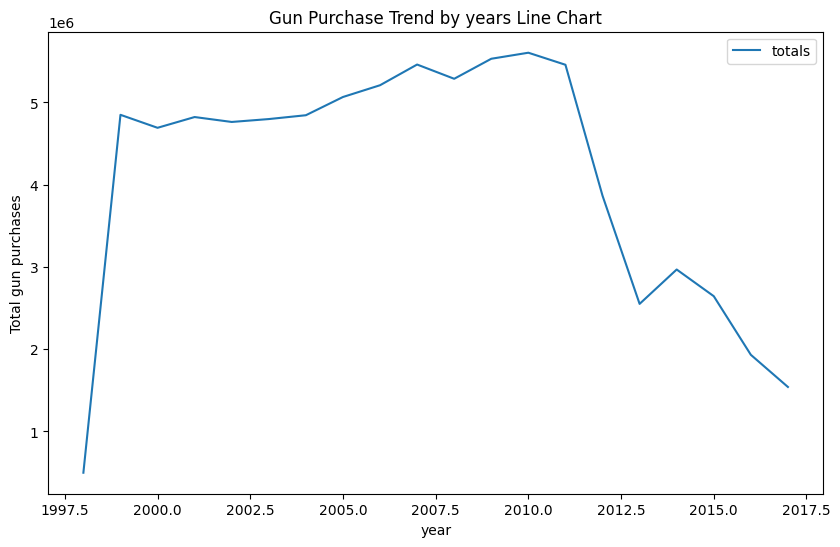

In [176]:
plt.figure(figsize=(10,5))

gun.groupby('month')['totals'].sum().plot(kind='line',sharex=True, sharey=True, layout = (2, 1))
#set x and y axis lable name
plt.xlabel('Month')
plt.ylabel('Total gun purchases')
plt.legend()
plt.title("Gun Purchase Trend by months Line Chart")
plt.show()

#2. Create line chart using grouped data by year, which can be used to observe the change during the season
plt.figure(figsize=(10,6))
gun.groupby('year')['totals'].sum().plot(kind='line')

plt.ylabel('Total gun purchases')
plt.xlabel('year')
plt.title("Gun Purchase Trend by years Line Chart")
plt.legend()
plt.show()

In [177]:
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

<class 'OSError'>: Not available